# Tarea 3: Convolución en 2D

- Martínez Ostoa Néstor I.
- Aprendizaje Profundo, LCD, IIMAS, UNAM

---

**Descripción**: implementar la operación convolución 2D para al menos 4 filtros

In [1]:
import numpy as np
from PIL import Image, ImageOps
import urllib.request
import matplotlib.pyplot as plt

In [2]:
def mult_linear(window, kernel):
    sum_ = 0
    (H, W) = kernel.shape
    for i in range(H):
        for j in range(W):
            sum_ += window[i][j] * kernel[i][j]
    return sum_

def conv_2D(X, kernel):
    """
    Parameters:
    -----------
    X: rank-2 vector (NumPy array)
        - data matrix; could be an image
        
    kernel: rank-2 vector (NumPy array)
        - for images, this is known as a filter
    
    Returns:
    -------- 
    conv: rank-2 vector (NumPy array)
        - result of applying convolution between X and the kernel
    """
    assert kernel.shape[0] == kernel.shape[1]
    assert X.shape[0] >= kernel.shape[0]
    assert X.shape[1] >= kernel.shape[1]
    
    conv = []
    (H, W) = kernel.shape
    (rows,cols) = X.shape
    for i in range(X.shape[0]):
        new_row = []
        for j in range(X.shape[1]):
            if (cols - j >= W) and (rows - i >= H):
                window = X[i:i+H,j:j+W]
                new_row.append(mult_linear(window, kernel))
            else:
                break
        if new_row != []:
            conv.append(np.array(new_row))
    return np.array(conv)

In [3]:
X = np.arange(0,9).reshape((3,3))
kernel = np.arange(0,4).reshape((2,2))
conv = conv_2D(X, kernel)

In [4]:
print(f"X:\n{X}\nkernel:\n{kernel}\n\nConv:\n{conv}")

X:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
kernel:
[[0 1]
 [2 3]]

Conv:
[[19 25]
 [37 43]]


## Filtros

In [5]:
vef = [np.array([[1,0,-1],[1,0,-1],[1,0,-1]]), 'Vertical Edge filter']
hef = [np.array([[1,1,1],[0,0,0],[1,1,1]]), 'Horizontal Edge filter']
ef = [np.array([[1,1,1],[1,-7,1],[1,1,1]]), 'Edge filter']
db = [np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]), 'Dark Borders filter']
ufb = [-1/9*np.ones(9).reshape((3,3)), 'Box unfocused filter']
ufg = [1/16*np.array([[1,2,1],[2,4,2],[1,2,1]]), 'Gaussian unfocused filter']
rel = [-1*np.ones(9).reshape((3,3)), 'Enhance filter']
rel[0][1,1] = 8

filters = [vef, hef, ef, db, ufb, ufg, rel]

## Imagen

In [6]:
def show_image(img, k):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.title(f'Kernel: {k}')
    plt.show()

In [7]:
name = "img.png"
url = "https://4.bp.blogspot.com/-DWMYGHj3R-Q/UsmTx4t5eZI/AAAAAAAARJU/INNLZh60jnU/s1600/St.+Basil%E2%80%99s+Cathedral+(5).jpg"
urllib.request.urlretrieve(url,name)
img = ImageOps.grayscale(Image.open(name)).resize((800,800))
X = np.asarray(img)

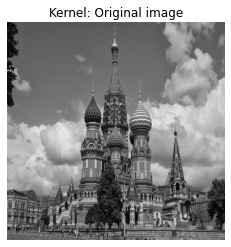

In [8]:
show_image(X, 'Original image')

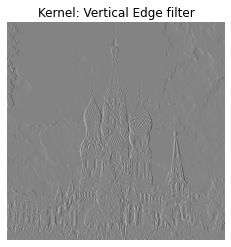

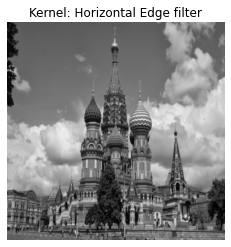

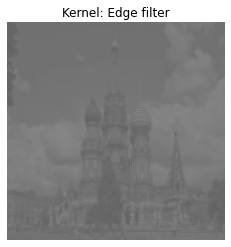

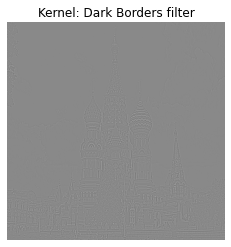

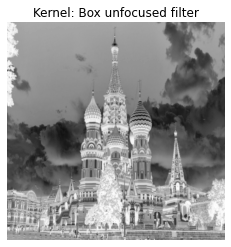

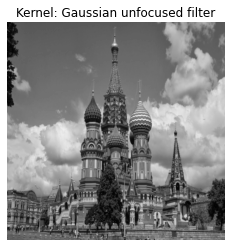

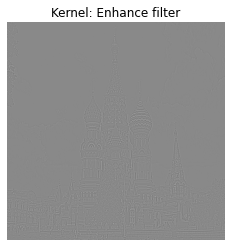

In [9]:
for k in filters:
    X = X.copy()
    conv = conv_2D(X, k[0])
    show_image(conv, k[1])